In [42]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

plt.rc('font', size=12)

In [43]:
df = pd.read_csv("data.csv")
df

,lambda,n,r_light,r_dark
0,706,1,1.00,1.07
1,706,2,1.15,1.25
2,706,3,1.35,1.40
3,706,4,1.50,1.55
4,706,5,1.60,1.65
5,434,1,0.99,1.08
6,434,2,1.18,1.22
7,434,3,1.32,1.36
8,434,4,1.41,1.46
9,434,5,1.47,1.50


In [44]:
df['lambda'] = df['lambda'] * 10**-9
df['r_light'] = df['r_light'] * 5 * 10**-5
df['r_dark'] = df['r_dark'] * 5 * 10**-5

In [45]:
gdf = df.groupby("lambda")

In [46]:
koefs_light = {}
koefs_dark = {}

for wave in np.unique(df['lambda']):
    temp = gdf.get_group(wave)
    x = temp['n']
    y_dark = temp['r_dark'] ** 2
    y_light = temp['r_light'] ** 2
    basis = np.vstack((x,np.ones(len(x)))).T
    koefs_dark[wave] = scipy.linalg.lstsq(basis, y_dark)[0]
    koefs_light[wave] = scipy.linalg.lstsq(basis, y_light)[0]

print(koefs_light)
print(koefs_dark)

{4.3400000000000005e-07: array([7.393250e-10, 1.913975e-09]), 5.46e-07: array([7.53150e-10, 1.54305e-09]), 6.56e-07: array([8.89700e-10, 1.74475e-09]), 7.06e-07: array([1.011875e-09, 1.441875e-09])}
{4.3400000000000005e-07: array([7.0260e-10, 2.3352e-09]), 5.46e-07: array([7.49350e-10, 1.94395e-09]), 6.56e-07: array([8.214750e-10, 2.371675e-09]), 7.06e-07: array([9.9880e-10, 1.8998e-09])}


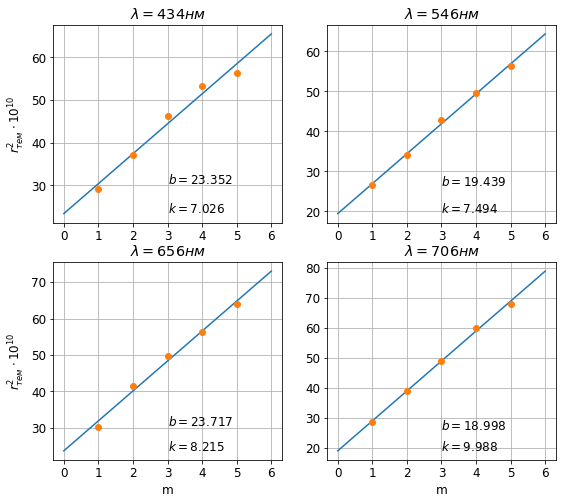

In [47]:
figs, axs = plt.subplots(2, 2, figsize=(9,8))

column = 0
row = 0
for wave in np.unique(df['lambda']):
    temp = gdf.get_group(wave)
    x0 = temp['n']
    y0 = temp['r_dark'] ** 2 * 10**10

    x = np.arange(0, 6, 0.0001)
    y = koefs_dark[wave][0] * x * 10**10 + koefs_dark[wave][1] * 10**10   

    axs[row, column].grid()
    axs[row, column].set_xticks(np.arange(0,7,1), minor=False)

    axs[row,column].set_title(fr"$\lambda = {int(wave*10**9)} нм$")
    axs[row, column].plot(x, y)
    axs[row, column].plot(x0, y0, 'o')
    
    axs[row, column].text(3, np.min(y) + 0.1, r"$k = $" + str(np.round(koefs_dark[wave][0] * 10**10, 3)))
    axs[row, column].text(3, np.min(y) + 7, r"$b = $" + str(np.round(koefs_dark[wave][1] * 10**10, 3)))

    column = (column + 1)%2
    if column is 0:
        row += 1

axs[0, 0].set(ylabel = r"$r^2_{тем} \cdot 10^{10}$")
axs[0, 1].set(xlabel = "", ylabel="")
axs[1, 0].set(xlabel = "m", ylabel = r"$r^2_{тем} \cdot 10^{10}$")
axs[1, 1].set(xlabel = "m", ylabel="")

plt.savefig(f"report/assets/r_dark(m).pdf" )

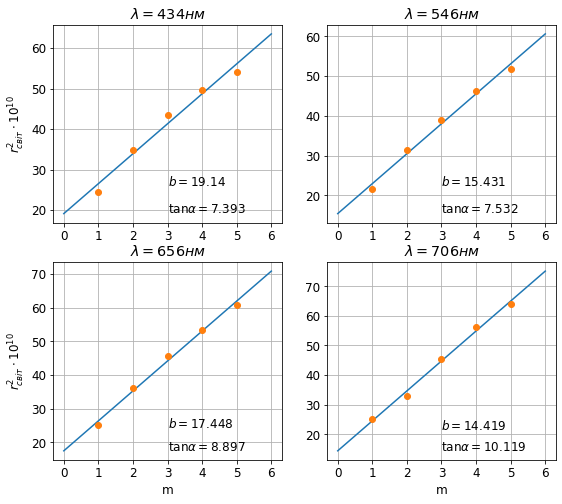

In [48]:
figs, axs = plt.subplots(2, 2, figsize=(9,8))

column = 0
row = 0
for wave in np.unique(df['lambda']):
    temp = gdf.get_group(wave)
    x0 = temp['n']
    y0 = temp['r_light'] ** 2 * 10**10

    x = np.arange(0, 6, 0.0001)
    y = koefs_light[wave][0] * x * 10**10 + koefs_light[wave][1] * 10**10   

    axs[row, column].grid()
    axs[row, column].set_xticks(np.arange(0,7,1), minor=False)

    axs[row,column].set_title(fr"$\lambda = {int(wave*10**9)} нм$")
    axs[row, column].plot(x, y)
    axs[row, column].plot(x0, y0, 'o')
    
    axs[row, column].text(3, np.min(y) + 0.1, r"$k = $" + str(np.round(koefs_light[wave][0] * 10**10, 3)))
    axs[row, column].text(3, np.min(y) + 7, r"$b = $" + str(np.round(koefs_light[wave][1] * 10**10, 3)))

    column = (column + 1)%2
    if column is 0:
        row += 1

axs[0, 0].set(ylabel = r"$r^2_{світ} \cdot 10^{10}$")
axs[0, 1].set(xlabel = "", ylabel="")
axs[1, 0].set(xlabel = "m", ylabel = r"$r^2_{світ} \cdot 10^{10}$")
axs[1, 1].set(xlabel = "m", ylabel="")

plt.savefig(f"report/assets/r_light(m).pdf" )

In [49]:
R = {}
R_dark = {}
R_light = {}
d0 = {}
d0_dark = {}
d0_light = {}
d = {}

for wave in np.unique(df['lambda']):
    R_dark[wave] = koefs_dark[wave][0] / wave
    R_light[wave] = koefs_light[wave][0] / wave
    R[wave] = np.mean([R_dark[wave], R_light[wave]])

    d0_dark[wave] = - (koefs_dark[wave][1] * wave) / ( 2 * koefs_dark[wave][0])
    d0_light[wave] = - (wave / 4 + koefs_light[wave][1] / ( 2 * R_light[wave]))
    d0[wave] = np.mean([d0_dark[wave], d0_light[wave]])
    d[wave] = 2 * np.sqrt(-2*R[wave]*d0[wave] - d0[wave]**2)

print(R_dark)
print(R_light)
print(R)
print(d0_dark)
print(d0_light)
print(d0)
print(d)

{4.3400000000000005e-07: 0.0016188940092165894, 5.46e-07: 0.0013724358974358973, 6.56e-07: 0.0012522484756097567, 7.06e-07: 0.0014147308781869684}
{4.3400000000000005e-07: 0.0017035138248847929, 5.46e-07: 0.0013793956043956044, 6.56e-07: 0.00135625, 7.06e-07: 0.0014332507082152972}
{4.3400000000000005e-07: 0.001661203917050691, 5.46e-07: 0.0013759157509157507, 6.56e-07: 0.0013042492378048784, 7.06e-07: 0.0014239907932011328}
{4.3400000000000005e-07: -7.212331340734419e-07, 5.46e-07: -7.082115833722558e-07, 6.56e-07: -9.469666149304597e-07, 7.06e-07: -6.714351221465758e-07}
{4.3400000000000005e-07: -6.702726642545559e-07, 5.46e-07: -6.958210515833503e-07, 6.56e-07: -8.072258064516131e-07, 7.06e-07: -6.795086473131561e-07}
{4.3400000000000005e-07: -6.957528991639988e-07, 5.46e-07: -7.02016317477803e-07, 6.56e-07: -8.770962106910364e-07, 7.06e-07: -6.75471884729866e-07}
{4.3400000000000005e-07: 9.614761173704782e-05, 5.46e-07: 8.789397682037507e-05, 6.56e-07: 9.564799696361349e-05, 7.06e-

In [50]:
df['R_dark'] = df['lambda'].map(R_dark) * 10**6
df['R_light'] = df['lambda'].map(R_light) * 10**6
df['R'] = df['lambda'].map(R) * 10**6
df['d0_dark'] = df['lambda'].map(d0_dark) * 10**6
df['d0_light'] = df['lambda'].map(d0_light) * 10**6
df['d0'] = df['lambda'].map(d0) * 10**6
df['d'] = df['lambda'].map(d) * 10**6

df['lambda'] = df['lambda'] * 10**9
df['r_light'] = df['r_light'] * 10**5
df['r_dark'] = df['r_dark'] * 10**5

In [51]:
df.drop(['n', 'r_light', 'r_dark'], axis = 1, inplace=True)
df.groupby('lambda').mean()

,R_dark,R_light,R,d0_dark,d0_light,d0,d
lambda,,,,,,,
434.0,1618.894009,1703.513825,1661.203917,-0.721233,-0.670273,-0.695753,96.147612
546.0,1372.435897,1379.395604,1375.915751,-0.708212,-0.695821,-0.702016,87.893977
656.0,1252.248476,1356.250000,1304.249238,-0.946967,-0.807226,-0.877096,95.647997
706.0,1414.730878,1433.250708,1423.990793,-0.671435,-0.679509,-0.675472,87.710324
